In [3]:
# 1.Project Introduction & Data Selection


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset : Considering as the high dimensional data for the comparison(3D)
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

# loading the moons_data : (non_linearly separable, 2D)
moons_data, moons_target = make_moons(n_samples=300, noise=0.1, random_state=42)

# Generate a synthetic dataset with make_blobs : For density variation studies.
# Considering 3 clusters for the study.
blobs_data, blobs_target = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], n_features=50, random_state=42)

# Standardize the datasets
scaler = StandardScaler()
iris_data_scaled = scaler.fit_transform(iris_data)
moons_data_scaled = scaler.fit_transform(moons_data)
blobs_data_scaled = scaler.fit_transform(blobs_data)

# Making Dataframes for better understanding of data.
iris_df = pd.DataFrame(iris_data_scaled, columns=iris.feature_names)
moons_df = pd.DataFrame(moons_data_scaled, columns=['Feature_1', 'Feature_2'])
blobs_df = pd.DataFrame(blobs_data_scaled)



In [5]:
# 2.Implementation of Kmeans algorithm in Different Datas.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Applying Kmeans in different using functions.
def apply_kmeans(data, n_clusters, title):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score for {title}: {silhouette_avg:.2f}")

    return labels, kmeans

# 1. Iris Dataset 
iris_labels, iris_kmeans = apply_kmeans(iris_data_scaled, n_clusters=3, title="Iris Dataset")

# 2. Moons Dataset 
moons_labels, moons_kmeans = apply_kmeans(moons_data_scaled, n_clusters=2, title="Moons Dataset")

# 3. Blobs Dataset
blobs_labels, blobs_kmeans = apply_kmeans(blobs_data_scaled, n_clusters=3, title="Blobs Dataset")



Silhouette Score for Iris Dataset: 0.46
Silhouette Score for Moons Dataset: 0.49
Silhouette Score for Blobs Dataset: 0.71


In [6]:
# 3. Implementation Of Hierarchical Clustering.

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Function defining for Hierarchical Clustering
def apply_hierarchical(data, n_clusters, title):
    # Apply Agglomerative Clustering/ Hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(data)
    
    # Calculating  the Silhouette Score
    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score for {title}: {silhouette_avg:.2f}")
    
    return labels, hierarchical

# 1. Iris Dataset 
iris_hier_labels, iris_hierarchical = apply_hierarchical(iris_data_scaled, n_clusters=3, title="Iris Dataset")

# 2. Moons Dataset 
moons_hier_labels, moons_hierarchical = apply_hierarchical(moons_data_scaled, n_clusters=2, title="Moons Dataset")

# 3. Blobs Dataset 
blobs_hier_labels, blobs_hierarchical = apply_hierarchical(blobs_data_scaled, n_clusters=3, title="Blobs Dataset")


Silhouette Score for Iris Dataset: 0.45
Silhouette Score for Moons Dataset: 0.45
Silhouette Score for Blobs Dataset: 0.71


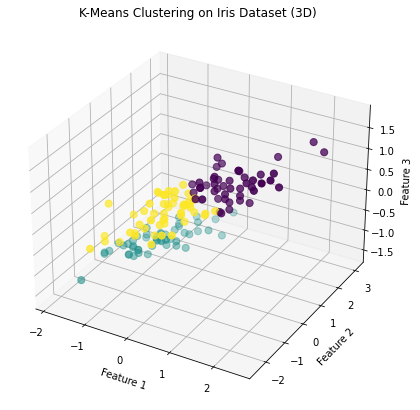

In [7]:
# 3(a) visualizing Kmeans clustering in Iris Dataset.


from mpl_toolkits.mplot3d import Axes3D

# Visualizing K-Means Clustering on the Iris Dataset
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1], iris_data_scaled[:, 2], c=iris_labels, cmap='viridis', s=50)
ax.set_title("K-Means Clustering on Iris Dataset (3D)")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


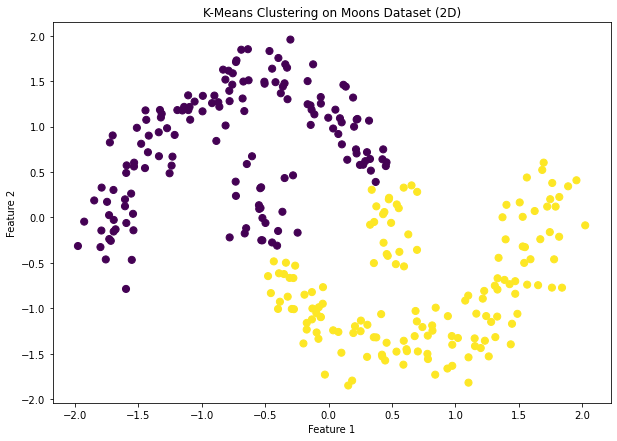

In [8]:
# 3(b) Visualizing Kmeans in Moon Dataset.

# Visualize K-Means Clustering on the Moons Dataset
plt.figure(figsize=(10, 7))
plt.scatter(moons_data_scaled[:, 0], moons_data_scaled[:, 1], c=moons_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering on Moons Dataset (2D)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


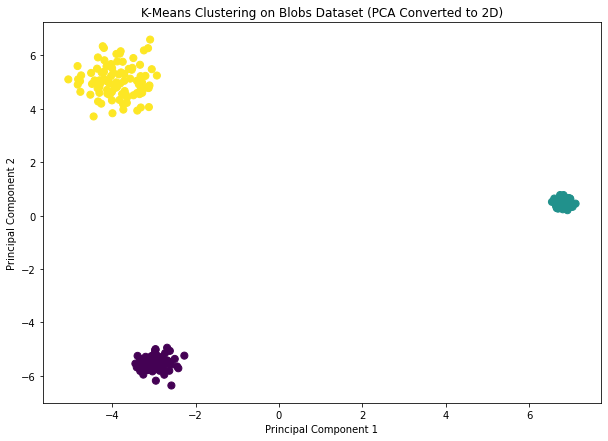

In [10]:
# 3(c) Visualizing Kmeans in Blobs Dataset

from sklearn.decomposition import PCA

# Reducing components as 2
pca = PCA(n_components=2)
blobs_data_pca = pca.fit_transform(blobs_data_scaled)

# Visualize K-Means Clustering on the Blobs Dataset
plt.figure(figsize=(10, 7))
plt.scatter(blobs_data_pca[:, 0], blobs_data_pca[:, 1], c=blobs_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering on Blobs Dataset (PCA Converted to 2D)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


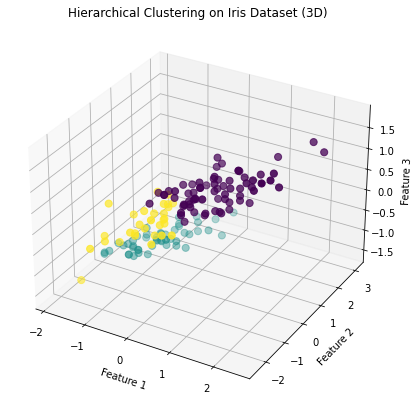

In [11]:
# 3(d) Visualizing Hierarchical in Iris Dataset.

# Visualize Iris Dataset Clustering : first three features.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1], iris_data_scaled[:, 2], c=iris_hier_labels, cmap='viridis', s=50)
ax.set_title("Hierarchical Clustering on Iris Dataset (3D)")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


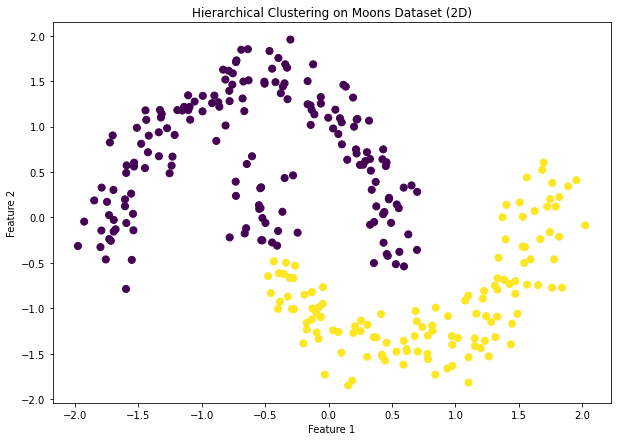

In [12]:
# 3(e) Visualizing Hierarchical Clustering in Moon Dataset

# Visualize Moons Dataset Clustering
plt.figure(figsize=(10, 7))
plt.scatter(moons_data_scaled[:, 0], moons_data_scaled[:, 1], c=moons_hier_labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering on Moons Dataset (2D)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


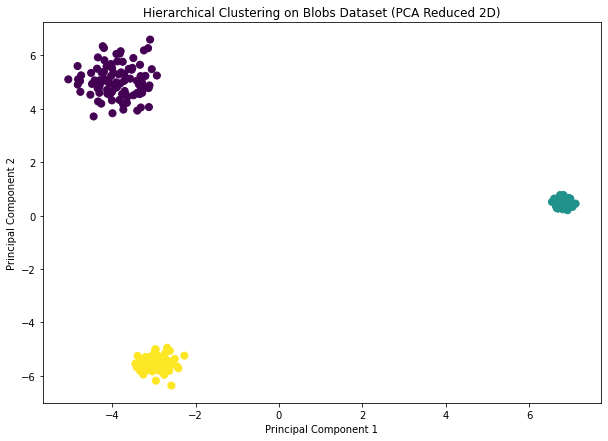

In [13]:
# 3(f) visualizing Hierarchocal Clustering in Blobs Dataset.

# Reduce the feature to 2 and using it.
blobs_data_pca = pca.fit_transform(blobs_data_scaled)

# Visualize Blobs Dataset Clustering
plt.figure(figsize=(10, 7))
plt.scatter(blobs_data_pca[:, 0], blobs_data_pca[:, 1], c=blobs_hier_labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering on Blobs Dataset (PCA Reduced 2D)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [15]:
# 4. Comparing the Kmeans and Hierarchical Clustering


# 4(a) Comparison of Execution Time.

import time

# Function to measure execution time
def measure_execution_time(data, algorithm, n_clusters=3):
    start_time = time.time()
    algorithm(n_clusters=n_clusters).fit(data)
    return time.time() - start_time

# Measuring Execution Time for K-Means on Iris Dataset
kmeans_time = measure_execution_time(iris_data_scaled, KMeans, n_clusters=3)
print(f"K-Means Execution Time on Iris Dataset: {kmeans_time:.4f} seconds")

# Measuring Execution Time for Hierarchical Clustering on Iris Dataset
hier_time = measure_execution_time(iris_data_scaled, AgglomerativeClustering, n_clusters=3)
print(f"Hierarchical Clustering Execution Time on Iris Dataset: {hier_time:.4f} seconds")


K-Means Execution Time on Iris Dataset: 0.0726 seconds
Hierarchical Clustering Execution Time on Iris Dataset: 0.0065 seconds


In [17]:
# Comparison of Cluster Purity

from sklearn.metrics import accuracy_score
from scipy.stats import mode

def calculate_purity(y_true, y_pred):
    clusters = np.unique(y_pred)
    total_correct = 0
    for cluster in clusters:
        # Finding the most common class in each cluster
        cluster_labels = y_true[y_pred == cluster]
        if len(cluster_labels) == 0:
            continue
        most_common_label = mode(cluster_labels)[0][0]
        total_correct += np.sum(cluster_labels == most_common_label)
    return total_correct / len(y_true)

# Assuming that there is true labels :true labels for Iris dataset (y_iris)
purity_kmeans = calculate_purity(iris_target, iris_labels)
purity_hierarchical = calculate_purity(iris_target, iris_hier_labels)

print(f"Cluster Purity for K-Means: {purity_kmeans:.2f}")
print(f"Cluster Purity for Hierarchical Clustering: {purity_hierarchical:.2f}")


Cluster Purity for K-Means: 0.83
Cluster Purity for Hierarchical Clustering: 0.83
